In [1]:
from collections import Counter, defaultdict
from copy import deepcopy
from operator import itemgetter
from random import shuffle
import seaborn as sns

import numpy as np
import pandas as pd
import scipy
from matplotlib import pylab, gridspec, pyplot as plt
from IPython.display import Image
import urllib


from sklearn.metrics import accuracy_score
from sklearn import metrics, neighbors, dummy, preprocessing, svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import scale


import matplotlib
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [29]:
df_iris = sns.load_dataset("iris")
df_iris = df_iris.sample(n=150)


#iris_data = load_iris()
#iris_X = iris_data.data
#iris_y = iris_data.target

In [30]:
#df_iris, encoders = number_encode_features(df_iris)
iris_X, iris_y = df_iris[df_iris.columns[:-1]].values, df_iris[df_iris.columns[-1]].values

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X,iris_y, test_size=0.33, random_state=42)

In [44]:
knn = KNeighborsClassifier(n_neighbors=10) 
clf_knn = knn.fit(iris_X_train, iris_y_train)

In [45]:
y_knn = clf_knn.predict(iris_X_test)

In [46]:
print ('knn =', metrics.accuracy_score(iris_y_test, y_knn))

knn = 0.96


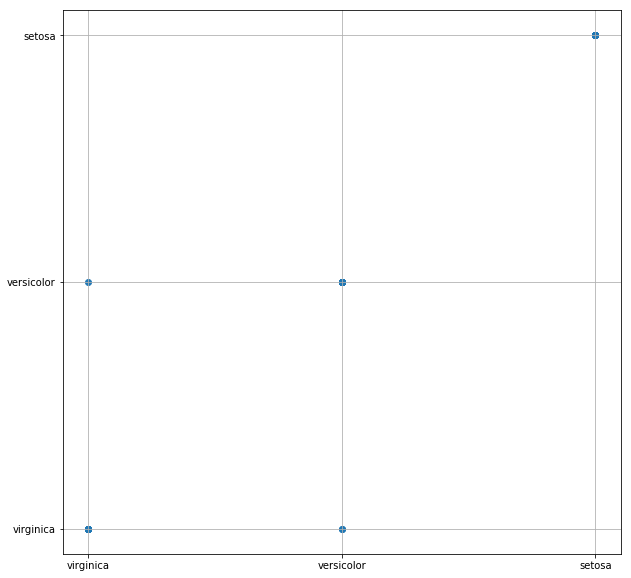

In [34]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(y_knn, iris_y_test)

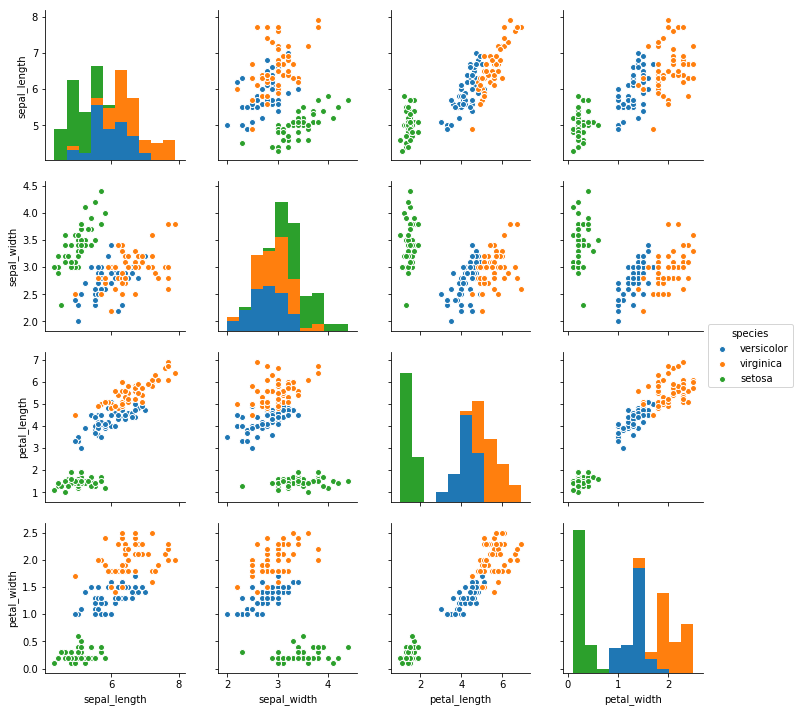

In [16]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
sns.pairplot(df_iris, hue="species")